# Airbnb Data Analysis

## About Dataset

**Context**

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in New York City


**Content**

The following Airbnb activity is included in this New York dataset:

Listings, including full descriptions and average review score Reviews, including unique id for each reviewer and detailed comments Calendar, including listing id and the price and availability for that day

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [2]:
# Read data from the source
df = pd.read_csv(
    'Airbnb_Open_Data.csv',
    parse_dates=['last review']
)
print(df.shape)
df.info()

(102599, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-

/var/folders/vd/tc__2y0925g5v0pl6zvb3hmh0000gn/T/ipykernel_38715/316766114.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [3]:
# Loop through the data to see if there is anything missing
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing * 100)}%')

id - 0%
NAME - 0%
host id - 0%
host_identity_verified - 0%
host name - 0%
neighbourhood group - 0%
neighbourhood - 0%
lat - 0%
long - 0%
country - 1%
country code - 0%
instant_bookable - 0%
cancellation_policy - 0%
room type - 0%
Construction year - 0%
price - 0%
service fee - 0%
minimum nights - 0%
number of reviews - 0%
last review - 15%
reviews per month - 15%
review rate number - 0%
calculated host listings count - 0%
availability 365 - 0%
house_rules - 51%
license - 100%


In [4]:
pd.set_option('display.max_columns', None)
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
# Drop empty columns
df.drop(columns=['license'], inplace=True)

In [6]:
# Check for record duplicates
df[df.duplicated()]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
102058,35506831,Master Bedroom with private Bathroom & Balcony,55110690425,unconfirmed,UZeyir,Queens,Maspeth,40.74056,-73.90635,United States,US,True,strict,Private room,2016.0,$706,$141,1.0,1.0,2021-11-14,0.27,3.0,1.0,339.0,NaN
102059,35507383,Cozy 2 br in sunny Fort Greene apt,80193772189,verified,Sally,Brooklyn,Fort Greene,40.68701,-73.97555,United States,US,False,flexible,Private room,2020.0,$651,$130,3.0,38.0,2021-11-13,0.27,3.0,1.0,0.0,NaN
102060,35507935,Duplex w/ Terrace @ Box House Hotel,72991962259,verified,The Box House Hotel,Brooklyn,Greenpoint,40.73756,-73.95350,United States,US,False,strict,Hotel room,2016.0,$907,$181,3.0,10.0,2021-11-13,0.08,3.0,30.0,32.0,NaN
102061,35508488,"Cozy, clean Greenpoint room with yard access",74975156081,verified,Dawn,Brooklyn,Greenpoint,40.72516,-73.95004,United States,US,False,strict,Private room,2013.0,$589,$118,30.0,38.0,2021-11-13,0.34,5.0,2.0,324.0,NaN
102062,35509040,2BR XL Loft: Cleaning CDC guidelines implemented,85844415221,unconfirmed,Vida,Brooklyn,Greenpoint,40.72732,-73.94185,United States,US,False,flexible,Entire home/apt,2015.0,$356,$71,30.0,13.0,2021-11-13,0.14,4.0,28.0,336.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaT,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaT,NaN,5.0,1.0,342.0,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,2015-10-11,0.10,3.0,1.0,386.0,NaN


In [7]:
# Exclude the duplicate records
df.drop_duplicates(inplace=True)
df.shape

(102058, 25)

In [8]:
# Convert data types of currency features to int (price, service fee)
replacements = {
    'price': {
        r'($|,)': ''
    }
}
#df.replace(replacements, regex=True, inplace=True)
df['price'] = df.loc[:, 'price'].str.replace('$', '')
df['price'] = df.loc[:, 'price'].str.replace(',', '')
df['price'] = df.loc[:, 'price'].str.strip()
df.loc[:, 'price'].fillna(0, inplace=True)
df['price'] = df.loc[:, 'price'].astype('int64')
df['service fee'] = df.loc[:, 'service fee'].str.replace('$', '')
df['service fee'] = df.loc[:, 'service fee'].str.replace(',', '')
df['service fee'] = df.loc[:, 'service fee'].str.strip()
df.loc[:, 'service fee'].fillna(0, inplace=True)
df['service fee'] = df.loc[:, 'service fee'].astype('int64')

In [9]:
# Convert data types of numeric features to int
# - Minimum nights, number of reviews, review rate number,
# - calculated host listings count, availability 365
df.loc[:, 'minimum nights'].fillna(0, inplace=True)
df['minimum nights'] = df.loc[:, 'minimum nights'].astype('int64')
df.loc[:, 'number of reviews'].fillna(0, inplace=True)
df['number of reviews'] = df.loc[:, 'number of reviews'].astype('int64')
df.loc[:, 'review rate number'].fillna(0, inplace=True)
df['review rate number'] = df.loc[:, 'review rate number'].astype('int64')
df.loc[:, 'calculated host listings count'].fillna(0, inplace=True)
df['calculated host listings count'] = \
    df.loc[:, 'calculated host listings count'].astype('int64')

df.loc[:, 'availability 365'].fillna(0, inplace=True)
df['availability 365'] = df.loc[:, 'availability 365'].astype('int64')
df.dtypes

id                                         int64
NAME                                      object
host id                                    int64
host_identity_verified                    object
host name                                 object
neighbourhood group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
country                                   object
country code                              object
instant_bookable                          object
cancellation_policy                       object
room type                                 object
Construction year                        float64
price                                      int64
service fee                                int64
minimum nights                             int64
number of reviews                          int64
last review                       datetime64[ns]
reviews per month   

In [10]:
# Inspect the categorical features
print(f'''{df['neighbourhood group'].value_counts()}

{df['host_identity_verified'].value_counts()}

{df['cancellation_policy'].value_counts()}

{df['room type'].value_counts()}
'''
)

neighbourhood group
Manhattan        43557
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
brookln              1
manhatan             1
Name: count, dtype: int64

host_identity_verified
unconfirmed    50944
verified       50825
Name: count, dtype: int64

cancellation_policy
moderate    34162
strict      33929
flexible    33891
Name: count, dtype: int64

room type
Entire home/apt    53429
Private room       46306
Shared room         2208
Hotel room           115
Name: count, dtype: int64



In [11]:
# Replace misspelled values in the neighborhood group
ng_replacements = {
    'brookln': 'Brooklyn',
    'manhatan': 'Manhattan'
}
df.replace({'neighbourhood group': ng_replacements}, inplace=True)
df.loc[:, 'neighbourhood group'].fillna('None', inplace=True)
df.loc[:, 'neighbourhood group'].value_counts()

neighbourhood group
Manhattan        43558
Brooklyn         41631
Queens           13197
Bronx             2694
Staten Island      949
None                29
Name: count, dtype: int64

In [12]:
# Capitalize values of host identity verification
df['host_identity_verified'] = df.loc[:, 'host_identity_verified'].str.capitalize()
df.loc[:, 'host_identity_verified'].fillna('No Status', inplace=True)
df.loc[:, 'host_identity_verified'].value_counts()

host_identity_verified
Unconfirmed    50944
Verified       50825
No Status        289
Name: count, dtype: int64

In [13]:
# Capitalize values of cancellation policy
df['cancellation_policy'] = df.loc[:, 'cancellation_policy'].str.capitalize()
df.loc[:, 'cancellation_policy'].fillna('None', inplace=True)
df.loc[:, 'cancellation_policy'].value_counts()

cancellation_policy
Moderate    34162
Strict      33929
Flexible    33891
None           76
Name: count, dtype: int64

In [14]:
# Capitalize values of room type
df['room type'] = df.loc[:, 'room type'].str.title()
df.loc[:, 'room type'].fillna('None', inplace=True)
df.loc[:, 'room type'].value_counts()

room type
Entire Home/Apt    53429
Private Room       46306
Shared Room         2208
Hotel Room           115
Name: count, dtype: int64

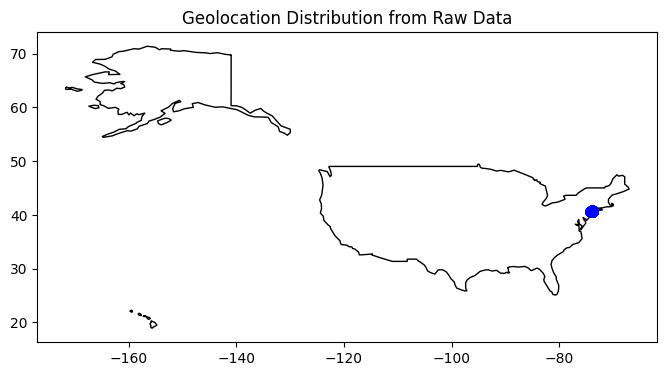

In [15]:
# Visualize the initial geolocation data
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(
        df['long'],
        df['lat']
    )
)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world['name'] == 'United States of America'].plot(
    figsize=(8, 8),
    color='white',
    edgecolor='black'
)
ax.set_title('Geolocation Distribution from Raw Data')
gdf.plot(ax=ax, color='blue')
plt.show()

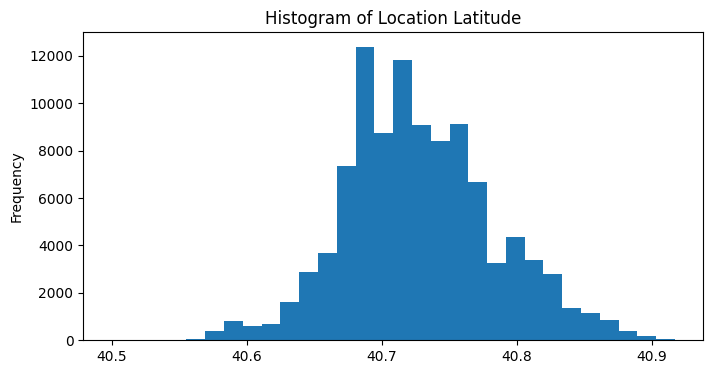

In [16]:
# Plot a histogram to visualize latitude distribution
fig, ax = plt.subplots(figsize=(8, 4))
ax = df['lat'].plot(kind='hist', bins=30)
ax.set_title('Histogram of Location Latitude')
plt.show()

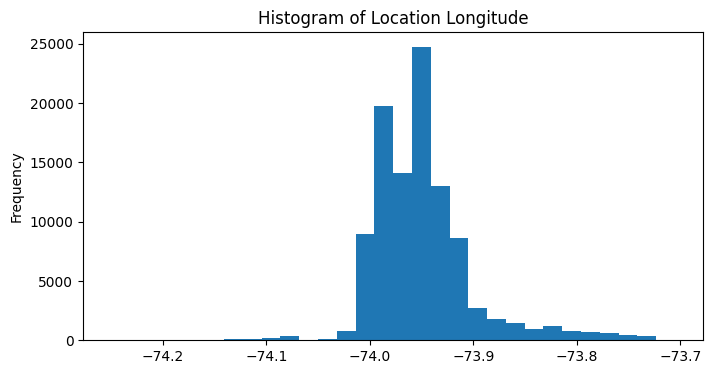

In [17]:
# Plot a histogram to visualize latitude distribution
fig, ax = plt.subplots(figsize=(8, 4))
ax = df['long'].plot(kind='hist', bins=30)
ax.set_title('Histogram of Location Longitude')
plt.show()

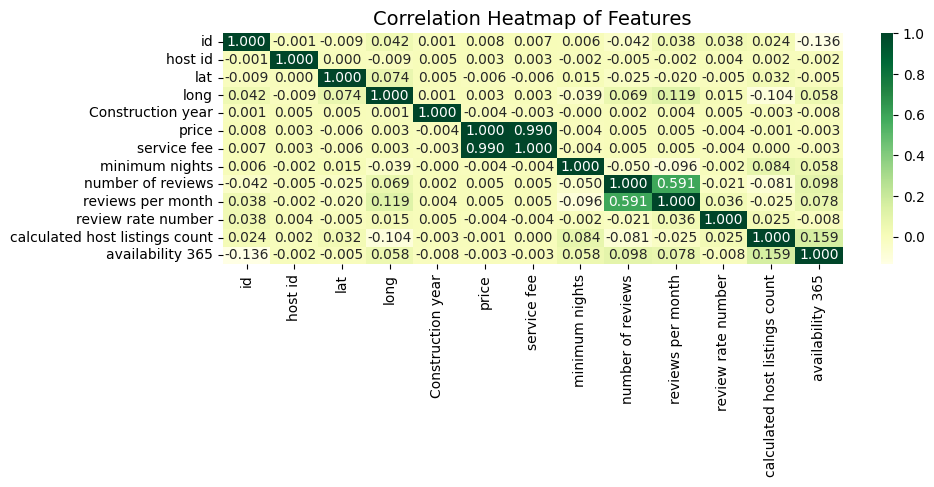

In [18]:
# Generate a correlation heat map of the dataset's features
fig, ax = plt.subplots(figsize = (10, 3))
cormat = df[df.columns.values.tolist()].corr(numeric_only=True)
sns.heatmap(cormat, cmap='YlGn', annot=True, fmt='.3f', ax=ax)
ax.set_title(
    'Correlation Heatmap of Features',
    fontsize=14
)
plt.show()